In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Happiness_index.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
pd.set_option("display.max_rows",None)

In [7]:
df.shape

(158, 12)

Here we have 158 rows and 12 columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [9]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

Here Region and Country coulmns are object type

In [10]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

# Statistical Summary

In [11]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


we will check outliers and skewness seprately in further steps

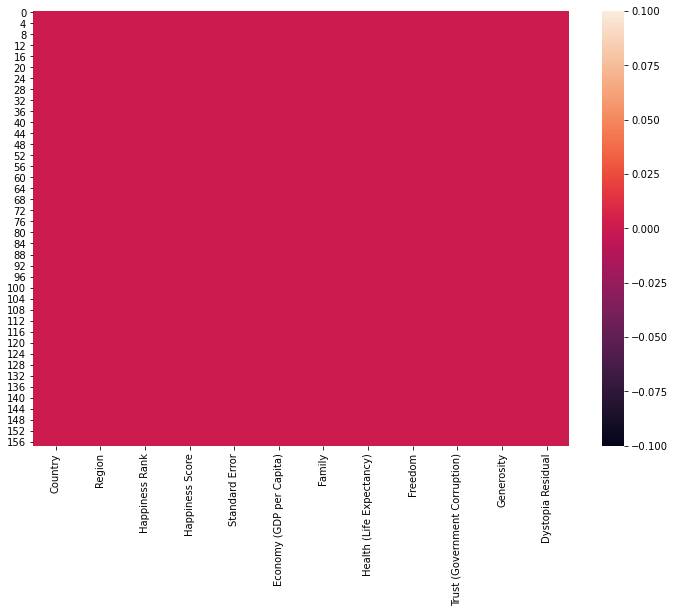

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())
plt.show()

on the above visaulization we see that there is no missing or nan values are presents.

In [14]:
df["Region"].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

Here we have 14 unique values in 'Region' columns

<AxesSubplot:>

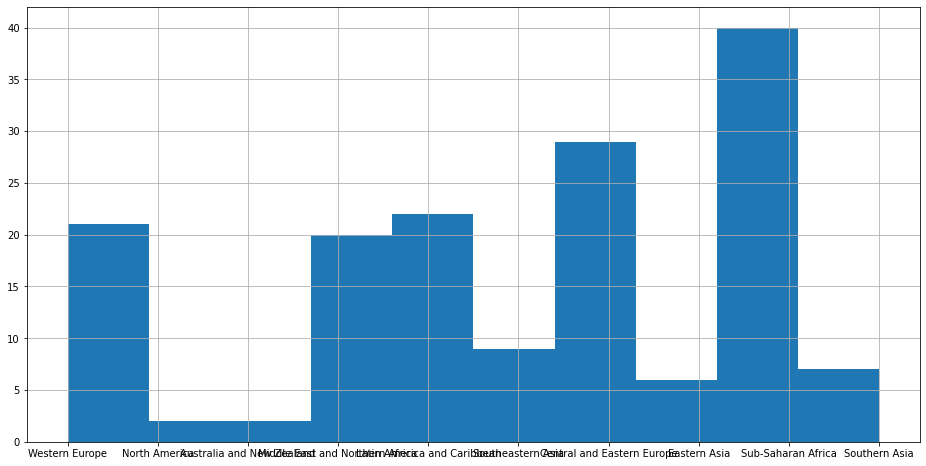

In [16]:
plt.figure(figsize=(16,8))
df["Region"].hist(grid=True)

There is a sign of class imbalance on the above visualization, so on further step it has to be removed.

# Checking Correlation

In [38]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


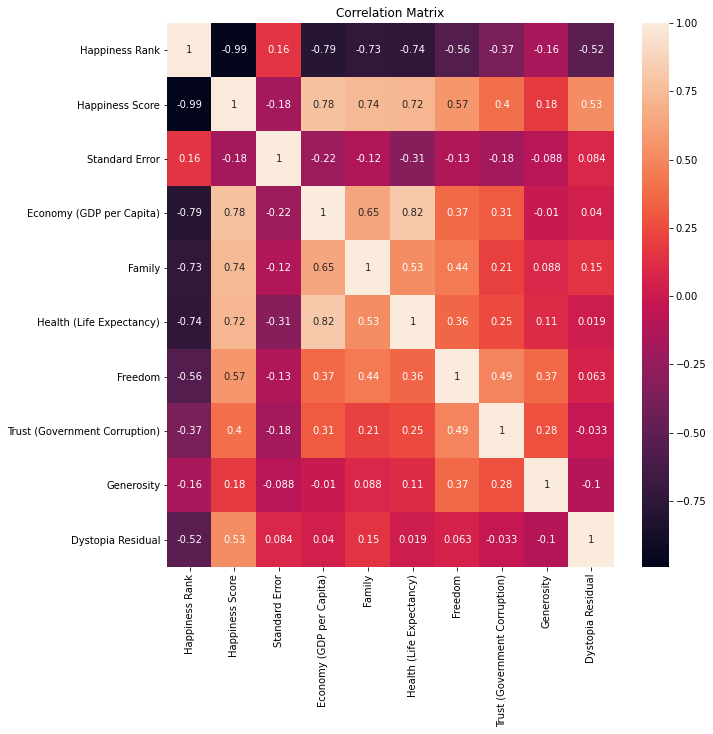

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Matrix")
plt.show()

# Let's plot Uni_variate Analysis

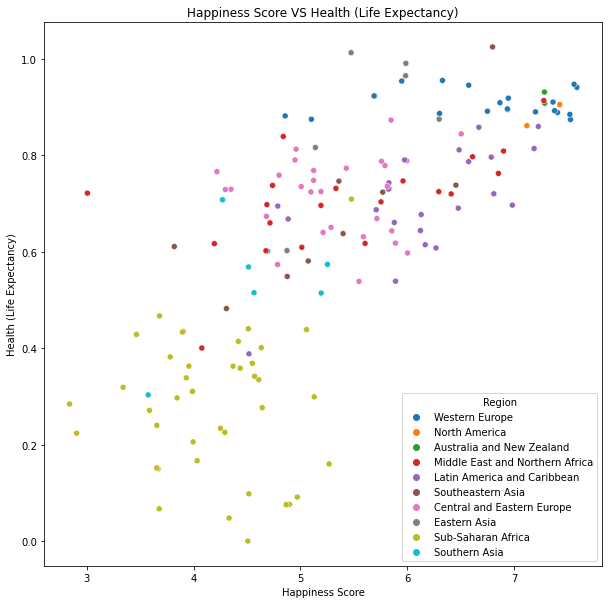

In [19]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Happiness Score",y="Health (Life Expectancy)",data=df,hue="Region")
plt.title("Happiness Score VS Health (Life Expectancy)")
plt.show()

Happiness Rank                      AxesSubplot(0.125,0.749828;0.133621x0.130172)
Happiness Score                  AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Standard Error                    AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Economy (GDP per Capita)         AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Family                           AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Health (Life Expectancy)            AxesSubplot(0.125,0.593621;0.133621x0.130172)
Freedom                          AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Trust (Government Corruption)     AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Generosity                       AxesSubplot(0.606034,0.593621;0.133621x0.130172)
Dystopia Residual                AxesSubplot(0.766379,0.593621;0.133621x0.130172)
dtype: object

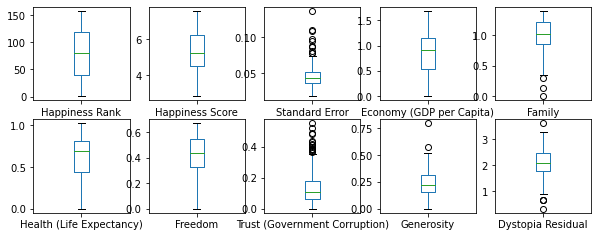

In [22]:
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(10,10))

On the above visualization, we have outliers which is nearby te whiskers, so we do not remove it nust to avoid the data loss here.

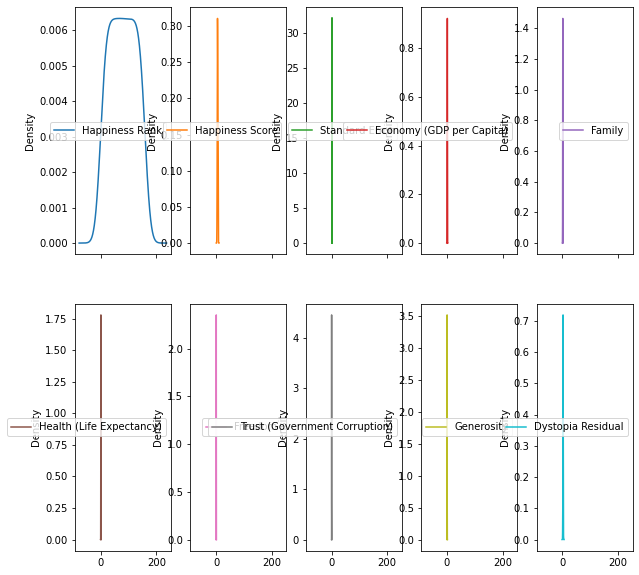

In [36]:
df.plot(kind="density",subplots=True,layout=(2,5),figsize=(10,10))
plt.show()

on the above visualization, i am checking distribution among all the columns

In [43]:
x=df.drop(["Region","Country"],axis=1)
y=df["Region"]

In [44]:
x.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

skewness is presents approx all the above columns

In [45]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [46]:
df_new.skew()

Happiness Rank                  -0.264365
Happiness Score                 -0.027956
Standard Error                  -0.020092
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.080728
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual                0.022925
dtype: float64

# Finding Best Random_State

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best accuracy score is",maxAcc,"on random_state",maxRS)

Best accuracy score is 0.6875 on random_state 90


# Creating train_test_split

In [50]:
x_train,y_train,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=90)

In [51]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.25
                                 precision    recall  f1-score   support

     Central and Eastern Europe       0.19      0.38      0.25         8
                   Eastern Asia       0.00      0.00      0.00         1
    Latin America and Caribbean       0.12      0.20      0.15         5
Middle East and Northern Africa       0.00      0.00      0.00         5
              Southeastern Asia       0.00      0.00      0.00         4
                  Southern Asia       0.00      0.00      0.00         3
             Sub-Saharan Africa       0.38      0.38      0.38        16
                 Western Europe       0.29      0.33      0.31         6

                       accuracy                           0.25        48
                      macro avg       0.12      0.16      0.14        48
                   weighted avg       0.20      0.25      0.22        48

[[3 0 2 0 0 0 2 1]
 [0 0 1 0 0 0 0 0]
 [2 0 1 0 0 0 2 0]
 [2 0 1 0 0 0 2 0]
 [1 0 0 0 0 0 2 1]
 [0 0 1 0 0 0 1 1]
 [

In [52]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.16666666666666666
                                 precision    recall  f1-score   support

     Central and Eastern Europe       0.15      0.25      0.19         8
                   Eastern Asia       0.00      0.00      0.00         1
    Latin America and Caribbean       0.00      0.00      0.00         5
Middle East and Northern Africa       0.00      0.00      0.00         5
              Southeastern Asia       0.33      0.25      0.29         4
                  Southern Asia       0.00      0.00      0.00         3
             Sub-Saharan Africa       0.31      0.25      0.28        16
                 Western Europe       0.50      0.17      0.25         6

                       accuracy                           0.17        48
                      macro avg       0.16      0.11      0.13        48
                   weighted avg       0.22      0.17      0.18        48

[[2 3 0 0 0 0 3 0]
 [0 0 1 0 0 0 0 0]
 [2 0 0 0 0 1 2 0]
 [1 0 1 0 1 0 2 0]
 [1 0 1 0 1 0 1 0]
 [2 0 

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.20833333333333334
                                 precision    recall  f1-score   support

     Central and Eastern Europe       0.15      0.25      0.19         8
                   Eastern Asia       0.00      0.00      0.00         1
    Latin America and Caribbean       0.00      0.00      0.00         5
Middle East and Northern Africa       0.00      0.00      0.00         5
              Southeastern Asia       0.50      0.25      0.33         4
                  Southern Asia       0.00      0.00      0.00         3
             Sub-Saharan Africa       0.36      0.31      0.33        16
                 Western Europe       0.67      0.33      0.44         6

                       accuracy                           0.21        48
                      macro avg       0.21      0.14      0.16        48
                   weighted avg       0.27      0.21      0.23        48

[[2 3 0 0 0 0 3 0]
 [0 0 1 0 0 0 0 0]
 [2 0 0 0 0 1 2 0]
 [1 0 1 0 1 0 2 0]
 [1 0 1 0 1 0 1 0]
 [1 0 

In [54]:
from sklearn.svm import SVC
SVC=LogisticRegression()
SVC.fit(x_train,y_train)
pred=SVC.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.25
                                 precision    recall  f1-score   support

     Central and Eastern Europe       0.19      0.38      0.25         8
                   Eastern Asia       0.00      0.00      0.00         1
    Latin America and Caribbean       0.12      0.20      0.15         5
Middle East and Northern Africa       0.00      0.00      0.00         5
              Southeastern Asia       0.00      0.00      0.00         4
                  Southern Asia       0.00      0.00      0.00         3
             Sub-Saharan Africa       0.38      0.38      0.38        16
                 Western Europe       0.29      0.33      0.31         6

                       accuracy                           0.25        48
                      macro avg       0.12      0.16      0.14        48
                   weighted avg       0.20      0.25      0.22        48

[[3 0 2 0 0 0 2 1]
 [0 0 1 0 0 0 0 0]
 [2 0 1 0 0 0 2 0]
 [2 0 1 0 0 0 2 0]
 [1 0 0 0 0 0 2 1]
 [0 0 1 0 0 0 1 1]
 [

In [56]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
pred=kn.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.1875
                                 precision    recall  f1-score   support

     Central and Eastern Europe       0.17      0.38      0.23         8
                   Eastern Asia       0.00      0.00      0.00         1
    Latin America and Caribbean       0.00      0.00      0.00         5
Middle East and Northern Africa       0.00      0.00      0.00         5
              Southeastern Asia       0.00      0.00      0.00         4
                  Southern Asia       0.00      0.00      0.00         3
             Sub-Saharan Africa       0.38      0.31      0.34        16
                 Western Europe       0.50      0.17      0.25         6

                       accuracy                           0.19        48
                      macro avg       0.13      0.11      0.10        48
                   weighted avg       0.22      0.19      0.18        48

[[3 2 1 0 0 0 2 0]
 [1 0 0 0 0 0 0 0]
 [3 0 0 0 0 0 2 0]
 [3 0 1 0 0 0 1 0]
 [1 0 1 0 0 0 2 0]
 [0 0 1 1 0 0 1 0]


In [57]:
from sklearn.model_selection import cross_val_score

In [82]:
scr=cross_val_score(lg,x,y,cv=5)
print("Cross validation Score of Logistic Ression",scr.mean())

Cross validation Score of Logistic Ression 0.4620967741935484


In [61]:
scr=cross_val_score(dtc,x,y,cv=5)
print("Cross validation Score of Decision Tree Classifier",scr.mean())

Cross validation Score of Decision Tree Classifier 0.5743951612903226


In [62]:
scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation Score of Decision Tree Classifier",scr.mean())

Cross validation Score of Decision Tree Classifier 0.5495967741935484


In [64]:
scr=cross_val_score(SVC,x,y,cv=5)
print("Cross validation Score of Decision Tree Classifier",scr.mean())

Cross validation Score of Decision Tree Classifier 0.4620967741935484


In [65]:
scr=cross_val_score(kn,x,y,cv=5)
print("Cross validation Score of Decision Tree Classifier",scr.mean())

Cross validation Score of Decision Tree Classifier 0.1594758064516129


Minium difference in accuracy and cross validation score is for DecisionTreeClassifier

# Hyper parameter_tuning

In [66]:
from sklearn.model_selection import GridSearchCV

In [71]:
#creating parameter list to pass in GridSearchCV

parameters={"max_depth":np.arange(2,15),
           "criterion":["gini","entropy"]}

In [74]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5) #tuning decisiontreeclassifier

In [75]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [76]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [81]:
mod=DecisionTreeClassifier(criterion="gini",max_depth=4,random_state=90)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

14.583333333333334


In [83]:
parameters={"n_neighbors":np.arange(2,15),
            "weights":["uniform","distance"]}

In [84]:
GCV=GridSearchCV(KNeighborsClassifier(),parameters,cv=5) #tuning decisiontreeclassifier

In [85]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'weights': ['uniform', 'distance']})

In [86]:
GCV.best_params_

{'n_neighbors': 13, 'weights': 'uniform'}

In [95]:
mod1=KNeighborsClassifier(weights="uniform",n_neighbors=13)

mod1.fit(x_train,y_train)
pred=mod1.predict(x_test)
print(accuracy_score(y_test,pred)*100)

18.75


# Saving the Model 

In [96]:
import joblib
joblib.dump(mod1,"WorldHappinessReport.pkl")

['WorldHappinessReport.pkl']

# Loading the save model

In [97]:
model=joblib.load("WorldHappinessReport.pkl")

In [98]:
predict=model.predict(x_test)

In [99]:
print(accuracy_score(y_test,predict)*100)

18.75
